In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:11<00:00, 92.2MB/s]
100% 1.06G/1.06G [00:12<00:00, 94.8MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [6]:
# Generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [8]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 80s 107ms/step - loss: 1.6295 - accuracy: 0.6113 - val_loss: 0.5949 - val_accuracy: 0.6992
Epoch 2/10
625/625 [==============================] - 60s 96ms/step - loss: 0.6037 - accuracy: 0.7027 - val_loss: 2.4530 - val_accuracy: 0.5120
Epoch 3/10
625/625 [==============================] - 61s 97ms/step - loss: 0.5258 - accuracy: 0.7427 - val_loss: 0.9476 - val_accuracy: 0.5984
Epoch 4/10
625/625 [==============================] - 60s 96ms/step - loss: 0.4473 - accuracy: 0.7917 - val_loss: 0.5176 - val_accuracy: 0.7718
Epoch 5/10
625/625 [==============================] - 60s 95ms/step - loss: 0.3739 - accuracy: 0.8356 - val_loss: 0.8336 - val_accuracy: 0.5596
Epoch 6/10
625/625 [==============================] - 61s 97ms/step - loss: 0.3098 - accuracy: 0.8675 - val_loss: 0.5066 - val_accuracy: 0.7612
Epoch 7/10
625/625 [==============================] - 58s 92ms/step - loss: 0.2130 - accuracy: 0.9125 - val_loss: 0.7688 - val_accuracy

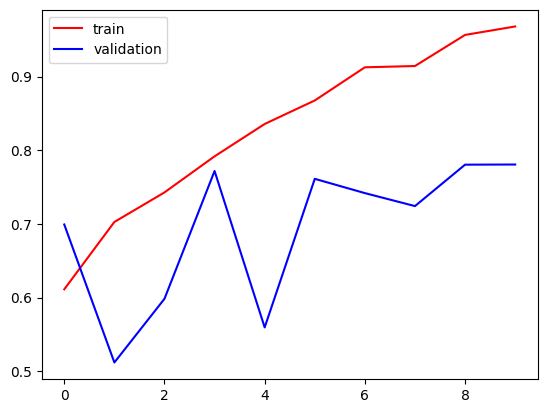

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

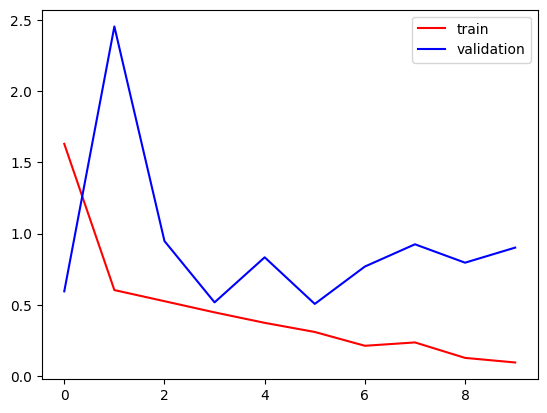

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()